672
718
832
962
991
1025
1046
1084
1289
1310
1372
1478
1501
2451
2476
2529
2555
2569
2976
3009
3023
3036
3056
3465
3510
3590
3733
3889
4121
4158
4174
4209
4222
4350
4366
4743
4846
4984
5087
5262
5281
5435
5536
5565
5580
5590
6348
7688
7816
49


c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\trist\AppData\Local\Temp\ipykernel_12468\2312534100.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = labels


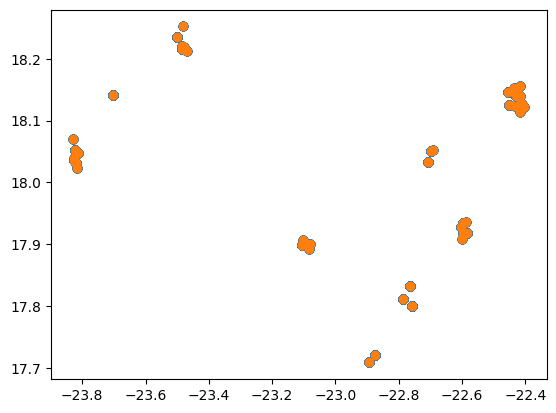

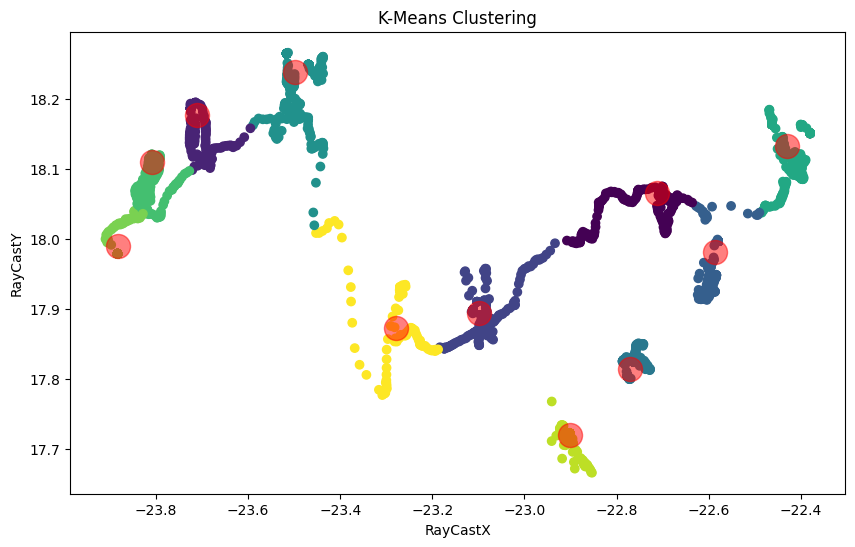

c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

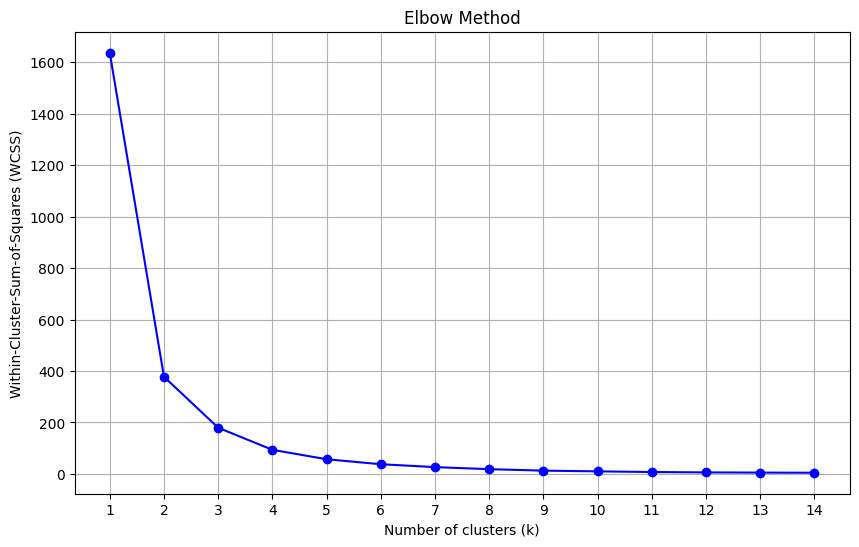

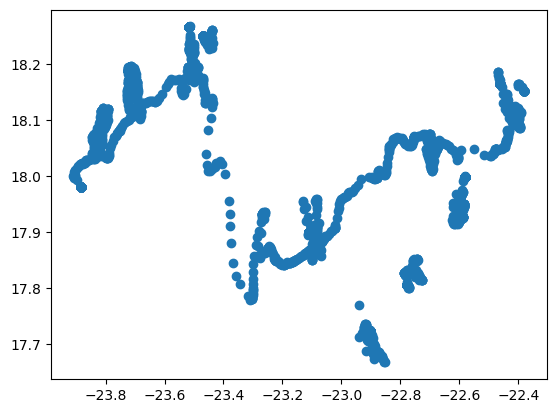

In [45]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
from sklearn.cluster import KMeans

# Get directories for 
current_dir = os.getcwd()

filesInCurrentDir = os.listdir(current_dir)
martyFilePath = 'C:\\Users\\trist\\OneDrive - The University of Texas at Austin\\Unity\\Placenta\\Placenta Simulation\\Assets\\PathData\\_HapticGuidance\\Marty'
filesInMarty = os.listdir('C:\\Users\\trist\\OneDrive - The University of Texas at Austin\\Unity\\Placenta\\Placenta Simulation\\Assets\\PathData\\_HapticGuidance\\Marty')
csvFile = martyFilePath + '\\' + filesInMarty[2]
df = pd.read_csv(csvFile)
# new_df = df[['RayCastX', 'RayCastY', 'RayCastZ']]
# Create a boolean mask for rows where all specified columns are not zero
maskWaypoints = (df['BlueSphereX'] != 0) & (df['BlueSphereY'] != 0) & (df['BlueSphereZ'] != 0)
new_dfWpts = df[maskWaypoints]
rows_list = []
numTimes = 0
listOfIndices = []
for i in range(0,len(new_dfWpts['BlueSphereX'])-2):
    if df['BlueSphereX'].iloc[i] != df['BlueSphereX'].iloc[i+1]:
        rows_list.append(df.iloc[i+1])
        numTimes+=1
        print(i)
        listOfIndices.append(i)
    # elif new_dfWpts['BlueSphereX'].iloc[i] == new_dfWpts['BlueSphereX'].iloc[i+1]:

for i in range(0,len(new_dfWpts['BlueSphereX'])-2):
    if new_dfWpts['BlueSphereX'].iloc[i] == new_dfWpts['BlueSphereX'].iloc[i+1]:
        pass
    
# for i in range
print(numTimes)
spot_df = pd.DataFrame(rows_list, columns=new_dfWpts.columns)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(new_dfWpts['BlueSphereX'], new_dfWpts['BlueSphereZ'])
ax.scatter(spot_df['BlueSphereX'], spot_df['BlueSphereZ'])

mask = (df['RayCastX'] != 0) & (df['RayCastY'] != 0) & (df['RayCastZ'] != 0)

new_df = df[mask]
data = new_df[['RayCastX', 'RayCastZ']]

kmeans1 = KMeans(n_clusters=11)
kmeans1.fit(data)
centers = kmeans1.cluster_centers_
labels = kmeans1.labels_
new_df['Cluster'] = labels

plt.figure(figsize=(10, 6))
plt.scatter(new_df['RayCastX'], new_df['RayCastZ'], c=new_df['Cluster'], cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5)

plt.title('K-Means Clustering')
plt.xlabel('RayCastX')
plt.ylabel('RayCastY')
plt.show()


wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
    wcss.append(kmeans.inertia_)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_



plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()



# rows_list = []
# for i in range(0,len(new_df['RayCastX'])-16):
#     if new_df['RayCastX'].iloc[i] == new_df['RayCastX'].iloc[i+15]:
#         rows_list.append(new_df.iloc[i])
# spot_df = pd.DataFrame(rows_list, columns=new_df.columns)
#         # pass
#     # else:
#     #     new_df_2 = new_df.
# print(len(new_df['RayCastX']))
# first50 = new_df.iloc[:7000]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(new_df['RayCastX'], new_df['RayCastZ'])
    

c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

i 11
num clusters 11


c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

i 9
num clusters 9
1552
3883
5004
6749
8430
9048
10189
10980
12749
13176
13453
11


c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\trist\AppData\Local\Temp\ipykernel_30920\3769028952.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = labels


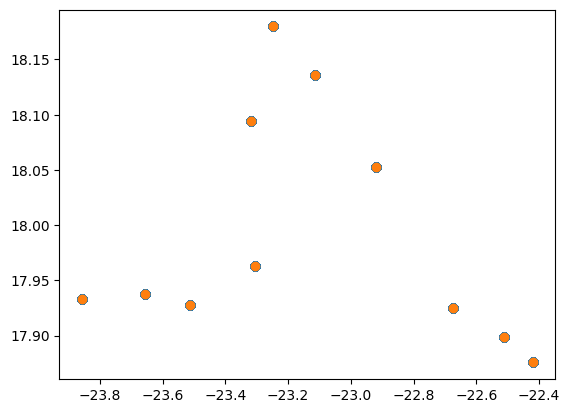

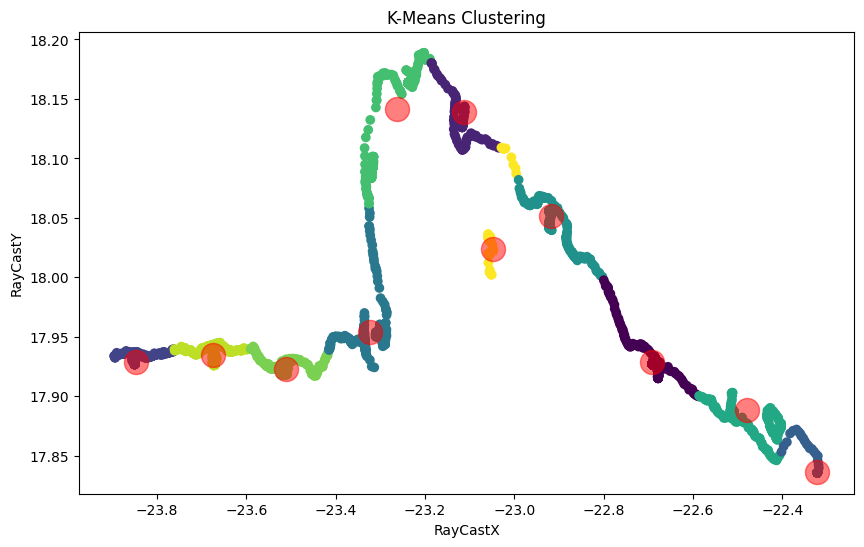

c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

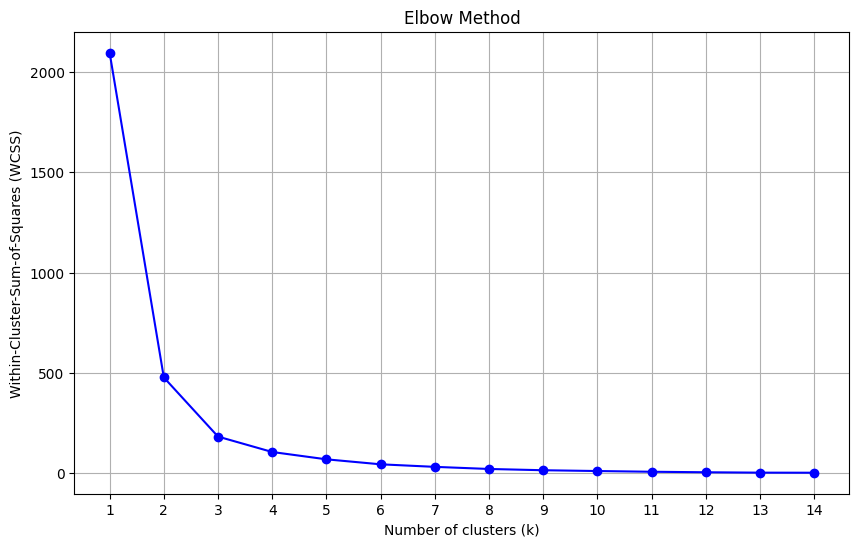

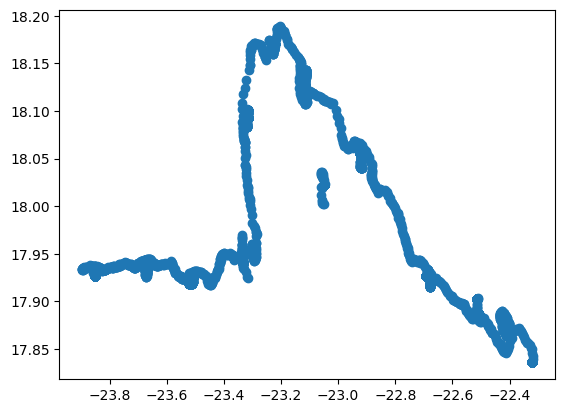

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
from sklearn.cluster import KMeans
from DataFunctions import *

# Get directories for 
current_dir = os.getcwd()

filesInCurrentDir = os.listdir(current_dir)
martyFilePath = 'C:\\Users\\trist\\OneDrive - The University of Texas at Austin\\Unity\\Placenta\\Placenta Simulation\\Assets\\PathData'
# filesInMarty = os.listdir('C:\\Users\\trist\\OneDrive - The University of Texas at Austin\\Unity\\Placenta\\Placenta Simulation\\Assets\\PathData\\_HapticGuidance\\Marty')
csvFile = martyFilePath + '\\' + 'recordedData01.csv'
df = pd.read_csv(csvFile)
clusterNumRay = getLazerClusters(df, 'RayCast')
print("num clusters", clusterNumRay[0])
clusterNumBlue = getLazerClusters(df, 'BlueSphere')
print("num clusters", clusterNumBlue[0])
errors = errorAnalysis(clusterNumBlue[1], clusterNumRay[1])
errors1 = errors[0]
errors2 = errors[1]
# print("errors", errors)
# new_df = df[['RayCastX', 'RayCastY', 'RayCastZ']]
# Create a boolean mask for rows where all specified columns are not zero
maskWaypoints = (df['BlueSphereX'] != 0) & (df['BlueSphereY'] != 0) & (df['BlueSphereZ'] != 0)
new_dfWpts = df[maskWaypoints]
rows_list = []
numTimes = 0

# THIS GETS NUMBER OF WAYPOINTS PLACED ON PLACENTA
for i in range(0,len(df['BlueSphereX'])-2):
    if df['BlueSphereX'].iloc[i] != df['BlueSphereX'].iloc[i+1]:
        rows_list.append(df.iloc[i+1])
        print(i)
        numTimes+=1
    # elif new_dfWpts['BlueSphereX'].iloc[i] == new_dfWpts['BlueSphereX'].iloc[i+1]:

for i in range(0,len(new_dfWpts['BlueSphereX'])-2):
    if new_dfWpts['BlueSphereX'].iloc[i] == new_dfWpts['BlueSphereX'].iloc[i+1]:
        pass
    
# for i in range
print(numTimes)
spot_df = pd.DataFrame(rows_list, columns=new_dfWpts.columns)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(new_dfWpts['BlueSphereX'], new_dfWpts['BlueSphereZ'])
ax.scatter(spot_df['BlueSphereX'], spot_df['BlueSphereZ'])

mask = (df['RayCastX'] != 0) & (df['RayCastY'] != 0) & (df['RayCastZ'] != 0)

new_df = df[mask]
data = new_df[['RayCastX', 'RayCastZ']]

kmeans1 = KMeans(n_clusters=11)
kmeans1.fit(data)
centers = kmeans1.cluster_centers_
labels = kmeans1.labels_
new_df['Cluster'] = labels

plt.figure(figsize=(10, 6))
plt.scatter(new_df['RayCastX'], new_df['RayCastZ'], c=new_df['Cluster'], cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5)

plt.title('K-Means Clustering')
plt.xlabel('RayCastX')
plt.ylabel('RayCastY')
plt.show()


wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
    wcss.append(kmeans.inertia_)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_



plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()



# rows_list = []
# for i in range(0,len(new_df['RayCastX'])-16):
#     if new_df['RayCastX'].iloc[i] == new_df['RayCastX'].iloc[i+15]:
#         rows_list.append(new_df.iloc[i])
# spot_df = pd.DataFrame(rows_list, columns=new_df.columns)
#         # pass
#     # else:
#     #     new_df_2 = new_df.
# print(len(new_df['RayCastX']))
# first50 = new_df.iloc[:7000]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(new_df['RayCastX'], new_df['RayCastZ'])
    

c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

i 12


c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

i 10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


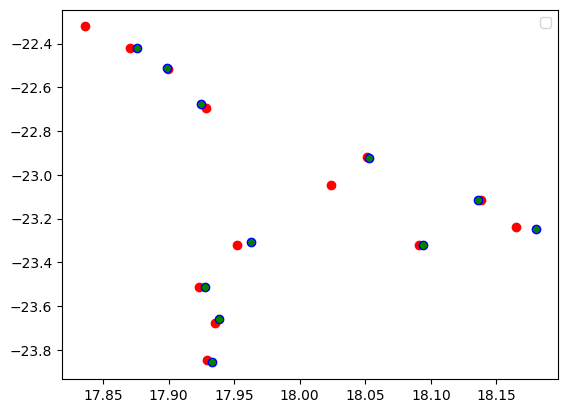

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
from sklearn.cluster import KMeans
from DataFunctions import *
import scipy.interpolate as spinterp

curdir = os.getcwd()

# martyFilePath = 'C:\\Users\\trist\\OneDrive - The University of Texas at Austin\\Unity\\Placenta\\Placenta Simulation\\Assets\\PathData'
martyFilePath = curdir
# filesInMarty = os.listdir('C:\\Users\\trist\\OneDrive - The University of Texas at Austin\\Unity\\Placenta\\Placenta Simulation\\Assets\\PathData\\_HapticGuidance\\Marty')
csvFile = curdir + '\\' + 'recordedData01.csv'
df = pd.read_csv(csvFile)
mask = (df['RayCastX'] != 0) & (df['RayCastY'] != 0) & (df['RayCastZ'] != 0)
mask_waypoint = (df['BlueSphereX'] != 0) & (df['BlueSphereY'] != 0) & (df['BlueSphereZ'] != 0)
laser_df = df[mask].reset_index(drop=True)
laser_clust = getLazerClusters(laser_df, 'RayCast')
laser_centroids = laser_clust[1]

waypoint_df = df[mask_waypoint].reset_index(drop=True)
waypoint_clust = getLazerClusters(waypoint_df, 'BlueSphere')
waypoint_centroids = waypoint_clust[1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(laser_centroids[:,0], laser_centroids[:,1], c='red')
ax.scatter(waypoint_centroids[:,0], waypoint_centroids[:,1], c='blue')
ax.scatter(waypoint_df['BlueSphereZ'], waypoint_df['BlueSphereX'], c='green',s=10)
# Add a legend
plt.legend()
plt.show()


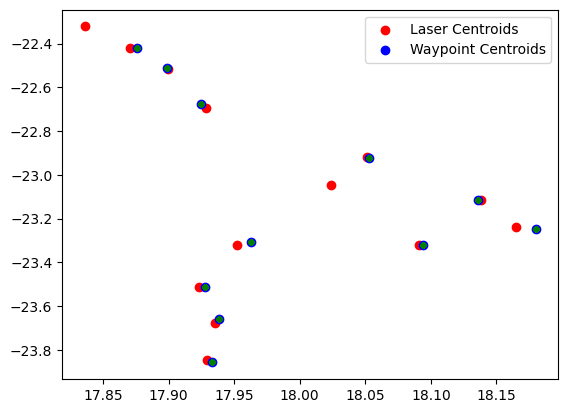

0.816590579043665
0.6834128454385867
0.43510891037295113
0.4802544677818207
0.41004556826377025
0.41682496817080567
0.4479204938797283
0.6255718766036201
0.6707059840810061
1.0
0.006249851114398159
-0.006287739220112233
0.006249853808271362
1.405888378850866e-06
1.3997376623544403e-06
1.3935869199891998e-06
0.0
1.3874361518685669e-06
0.006263962975604458
1.383800715811074e-06
1.3776111200661622e-06
0.0
1.3714214986996864e-06
1.3652318518265103e-06
0.006278090704832252
1.3613976211870898e-06
0.0
1.3551688133821436e-06


In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(laser_centroids[:,0], laser_centroids[:,1], c='red', label = 'Laser Centroids')
ax.scatter(waypoint_centroids[:,0], waypoint_centroids[:,1], c='blue', label = 'Waypoint Centroids')
ax.scatter(waypoint_df['BlueSphereZ'], waypoint_df['BlueSphereX'], c='green', s = 10)
# Add a legend
plt.legend()
plt.show()
wcss = waypoint_clust[2]
wcss_normalization = []
for i in range(0,len(wcss)-1):
    print((wcss[i] - wcss[i+1])/wcss[i])
    wcss_normalization.append((wcss[i] - wcss[i+1])/wcss[i])

In [4]:
error = errorAnalysis(waypoint_centroids, laser_centroids)[0]
print('error', error)

error 0.03473374311441547


In [5]:
# FOR PATH SMOOTHNESS
averageVelo = getPathSmoothness(laser_df['RayCastX'], laser_df['RayCastZ'], laser_df['Time'])[0]
averageAcc = getPathSmoothness(laser_df['RayCastX'], laser_df['RayCastZ'], laser_df['Time'])[1]
averageJerk = getPathSmoothness(laser_df['RayCastX'], laser_df['RayCastZ'], laser_df['Time'])[2]

In [1]:
import os
curdir = os.getcwd()
print(os.listdir(curdir))

['DataFunctions.py', 'DataFunctions.py.meta', 'dataVisualization.ipynb', 'dataVisualization.ipynb.meta', 'ExistingPathData', 'ExistingPathData.meta', 'Michael', 'Michael.meta', 'recordedData00.csv', 'recordedData00.csv.meta', 'recordedData01.csv', 'recordedData01.csv.meta', 'recordedData02.csv', 'recordedData02.csv.meta', 'recordedData09.csv', 'recordedData09.csv.meta', 'recordedData10.csv', 'recordedData10.csv.meta', 'recordedData11.csv', 'recordedData11.csv.meta', 'recordedData12.csv', 'recordedData12.csv.meta', 'recordedData13.csv', 'recordedData13.csv.meta', 'recordedData14.csv', 'recordedData14.csv.meta', 'recordedData15.csv', 'recordedData15.csv.meta', 'recordedData16.csv', 'recordedData16.csv.meta', 'recordedData17.csv', 'recordedData17.csv.meta', 'recordedData18.csv', 'recordedData18.csv.meta', 'recordedData19.csv', 'recordedData19.csv.meta', 'recordedData20.csv', 'recordedData20.csv.meta', 'recordedData21.csv', 'recordedData21.csv.meta', 'recordedData22.csv', 'recordedData22.c

In [2]:
from DataFunctions import *
import os
curdir = os.getcwd()
print(os.listdir(curdir))

updatedDirectory = curdir + '\\testSubjecPathData'
[avgs01, avgs02] = getCsvData(updatedDirectory, 'everything')

['DataFunctions.py', 'DataFunctions.py.meta', 'dataVisualization.ipynb', 'dataVisualization.ipynb.meta', 'ExistingPathData', 'ExistingPathData.meta', 'Michael', 'Michael.meta', 'recordedData00.csv', 'recordedData00.csv.meta', 'recordedData01.csv', 'recordedData01.csv.meta', 'recordedData02.csv', 'recordedData02.csv.meta', 'recordedData09.csv', 'recordedData09.csv.meta', 'recordedData10.csv', 'recordedData10.csv.meta', 'recordedData11.csv', 'recordedData11.csv.meta', 'recordedData12.csv', 'recordedData12.csv.meta', 'recordedData13.csv', 'recordedData13.csv.meta', 'recordedData14.csv', 'recordedData14.csv.meta', 'recordedData15.csv', 'recordedData15.csv.meta', 'recordedData16.csv', 'recordedData16.csv.meta', 'recordedData17.csv', 'recordedData17.csv.meta', 'recordedData18.csv', 'recordedData18.csv.meta', 'recordedData19.csv', 'recordedData19.csv.meta', 'recordedData20.csv', 'recordedData20.csv.meta', 'recordedData21.csv', 'recordedData21.csv.meta', 'recordedData22.csv', 'recordedData22.c

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'c:\\Users\\trist\\OneDrive - The University of Texas at Austin\\_UT_Spring_2024\\PathData\\testSubjectPathData//everything'